# Softmax

We use the Softmax function when we have a dataset that consists of inputs which can be classified into one of multiple output classes. Up until now, we have classified our data in PyTorch as either belonging to one of the two classes, *i.e.*, class `0` or class `1`. Now, we'll look at how we can use Softmax to classify our input data into one of the many classes belonging to the output.

$$
z = xW + b
$$

Below we show how the directed graph of the Softmax function looks like. The graph is identical to that of a multi output linear regression.

<img src="images/softmax.svg" width="30%"/>

The model is identical to multiple output linear regression, but instead of `Y` we use `Z`. For classification we are interested in the column indexes that pertains to the maximum value of `Z`.

<img src="images/zxwb.svg" width="50%"/>

We can apply the Softmax function to multiple input samples as well.

<img src="images/zxwb_multiple.svg" width="50%"/>

Let's talk about implementing the Softmax function in PyTorch. As we saw previously with logistic regression, we can create a custom module for Softmax using the nn dot module package in PyTorch. Here's how we would implement the Softmax function in PyTorch if we were implementing it from scratch. If you notice carefully, this implementation is very similar to a custom logistic regression. The only difference is, instead of 1 in out parameter, we are now using an `out_size` parameter in the constructor of this class. The parameter corresponds to the number of classes in the output. 

In [19]:
import torch
import torch.nn as nn
from torch.nn import Linear

torch.manual_seed(1)

class Softmax(nn.Module):
    def __init__(self, in_size, out_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

Let's try to use the Softmax class we just wrote. In the Softmax constructor for our model, we pass in 2 as the first parameter since we have a 2 dimensional input sample and 3 as the second parameter since we have 3 output classes. We have our input tensor with two dimensions, which we input to our model. We call the `max` function on `z`, where the argument of 1 indicates that we want to get the maximum value from `z` with respect to axis 1. In simple terms, this means we want the index pertaining to the `max` value from `z` with respect to each column. Since `z` only has one row, that means comparing all the columns values of `z` for only this one row.

In [20]:
model = Softmax(2, 3)
x = torch.tensor([[1.0,2.0]])
z = model(x)
_, yhat = z.max(1)
print('Z matrix:')
print(z)
print()
print('Index with maximum value: {}'.format(yhat))

Z matrix:
tensor([[-0.4053,  0.8864,  0.2807]], grad_fn=<AddmmBackward>)

Index with maximum value: tensor([1])


We see the column with index 1 corresponds to the largest value in `z`. In the output we get the column index corresponding to the largest value in `z`, which in this case is 1. This would represent the class of the sample `x`.

Let's look at the case when we have multiple multi dimensional inputs. We can represent this scenario as follows. We pass in `X` to our Softmax model and get `Z` as the output. Here we have the column indexes side by side with the actual values of `z`. We call the max function on `z` passing one as the argument, which will find the maximum index value with respect to the columns for each row in `z`. So for all samples, the maximum index corresponds to column 1. As a result each value in `yhat` would represent the class of each of the corresponding rows in `X`.

In [21]:
X = torch.tensor([[1.0, 1.0],
                  [1.0, 2.0],
                  [1.0, 3.0]])
Z = model(X)
_, yhat = Z.max(1)

print('Z matrix:')
print(Z)
print()
print('Index with maximum value: {}'.format(yhat))

Z matrix:
tensor([[-0.0932,  0.5545, -0.1433],
        [-0.4053,  0.8864,  0.2807],
        [-0.7174,  1.2183,  0.7048]], grad_fn=<AddmmBackward>)

Index with maximum value: tensor([1, 1, 1])


## Softmax Using Lines to Classify Data

Now, we talk about the Softmax function and understand its internal workings. First we'll start discussing the Softmax function in 1D and then we’ll cover the 2D case. This will give you an intuition of how the Softmax function generalizes to multiple dimensions. Just like logistic regression, we'll have integer classes but instead of just two classes. We could have multiple classes, and in this case we have four.

$$
y = \left [ \begin{matrix}
2 \\
1 \\
4 \\
0 \\
\end{matrix} \right ]
$$

We'll also have feature vectors or tensors and each sample. Each sample will correspond to a different row in the matrix or tensor $X$. Just like logistic regression the Softmax function will use different lines to classify data.

$$
X = \left [ \begin{matrix}
4.9 & 3 & 1.4 & 0.2 \\
4.1 & 1 & 1.4 & 0.2 \\
1.1 & 2.1 & 3 & -1  \\
4.3 & 1.9 & 1 & 7.9 \\
\end{matrix} \right ]
$$

Let's start with an example to understand how the Softmax function works. In this example we have three classes and a one-dimensional feature vector $x$. $y=0$ is denoted by the blue points, $y=1$ is denoted by the red points, and $y=2$ is denoted by the green points.

<img src="images/plot.svg" width="50%"/>

Now, it is pretty evident from this plot that any point in the left region will be classified as blue, points in the center region, will be classified as red, and points in the right region, will be classified as green.

<img src="images/plot_regions.svg" width="50%"/>

Let's see how we can use different lines to classify these points. Here we have three different lines each having their corresponding weights and bias terms. Let's look at the outputs of these lines and see what happens when we plug in different values for $x$.

<img src="images/plot_lines.svg" width="50%"/>

If we plug a value of $x$ in the first region, it turns out the output of the line $z$ zero will be greater than the red and green lines. From the image below it is clearly evident the output of the red line is lesser than the blue line. Thus, we can conclude that for values of $x$ in this region, $z_0$ is greater than $z_1$ and $z_2$.

<img src="images/plot_blue.svg" width="50%"/>

Similarly, if we plug a value of $x$ for the center region, the output of $z_1$ will be greater than the other lines. Thus, we can conclude that, the output of $z_1$ will be greater than $z_0$ and $z_2$ for values of $x$ in this region.

<img src="images/plot_red.svg" width="50%"/>

Finally if we're in the green region, the output of $z_2$ will be larger than any of the other lines. Thus the output of $z_2$ will be greater than $z_0$ and $z_1$ for values of $x$ in this region.

<img src="images/plot_green.svg" width="50%"/>

Before we continue let's review the `argmax` function. The argmax function returns the index corresponding to the largest value in a sequence of numbers. Below, the largest value in $z$ is 100, and the corresponding index is 0. Thus, the `argmax` function will return zero.

$$
Z = [100, 0.2, 0, 2, 3, 2, 0, 3, 0, 2] \\
\hat{y} = \text{argmax}_i{z_i} \\
\hat{y} = 0
$$

In this example, the largest value of $z$ is 10, and the corresponding index is 7, so the `argmax` function will return 7.

$$
Z = [1, 3, 2, 4, 3, 2, 0, 10, 9, 7] \\
\hat{y} = \text{argmax}_i{z_i} \\
\hat{y} = 7
$$

Now, let's combine the argmax function and the different lines we had from earlier for fully understanding the working of the Softmax function. Below, we have the three lines along with the actual values for the weights and bias parameters.

<img src="images/plot_example.svg" width="50%"/>

So let's say we have a sample of $x=-1.5$. Plugging in this value of $x$ in each line, we get an output for each line. For the green line we can't really see the output since it's negative. We store these outputs in the following table with the index $i$ corresponding to the line number and apply the `argmax` function to the table.

|     | $z_0$ | $z_1$ | $z_2$ |
| :-: | :---: | :---: | :---: |
|  i  |   0   |   1   |   2   |
|     |  2.33 |  1.15 | -3.30 |

Since the largest value corresponds to $z_0$. The `argmax` function returns zero and $\hat{y}=0$. That's the SoftMax prediction for that sample.

Let's look at another example. This time the value of $x=0.5$. Plugging in the values of $x$ in the different lines and storing the outputs in a table.

|     | $z_0$ | $z_1$ | $z_2$ |
| :-: | :---: | :---: | :---: |
|  i  |   0   |   1   |   2   |
|     | -1.25 |  1.36 |  0.64 |

Applying the `argmax` function we notice that this time the largest output corresponds to index 1 and thus $\hat{y}=1$. So Softmax will classify this sample as class 1.

Finally, let's select the value of $x=1.5$. Plugging in the values of $x$ in the different lines and storing the outputs in a table.

|     | $z_0$ | $z_1$ | $z_2$ |
| :-: | :---: | :---: | :---: |
|  i  |   0   |   1   |   2   |
|     | -3.05 |  1.46 |  2.60 |

Applying the `argmax` function we notice that this time the largest output corresponds to index 2 and thus $\hat{y}=2$. So Softmax will classify this sample as class 2.

Now, let's cover the Softmax function for the general case where we will have multi dimensional inputs. We'll use the MNIST dataset for explaining how Softmax works for the general case. The MNIST dataset is used for classifying handwritten digits into different classes ranging from 0 to 9.

<img src="images/mnist.svg" width="30%"/>

For each handwritten image we are going to concatenate it to a vector as follows.

<img src="images/mnist_data.svg" width="30%"/>

Since each image is a greyscale image, the intensity values for each pixel can range from 0 to 255. Further, each image in the MNIST dataset comprises of 784 pixels, thus our vector has 784 values in it. To visualize the softmax function, we'll consider vectors in 2 dimensions. Visualizing and plotting 784 dimensions would be extremely difficult. To visualize Softmax in 2D, you can think of the samples as vectors.

<img src="images/plot_2d.svg" width="30%"/>

Below, we have three weight parameters $w_0$, $w_1$ and $w_2$, the vectors values are shown in the table. 

| $i$ |                           $w$                               | $z_i = w_i x$ |
| :-: | :---------------------------------------------------------: | :-----------: |
|  1  | $\left [ \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right ]$   |               |
|  2  | $\left [ -\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right ]$  |               |
|  3  |                                                $[ 0, -1 ]$  |               |

These vectors represent the parameters of Softmax in 2D. The Softmax function is used for finding the points nearest to each parameter vector. So anything in the second quadrant will be classified as blue because its nearest to the vector $w_1$.
Similarly, anything in the first quadrant will be classified as red because it's nearest to the vector $w_0$. We can do the same for the green parameter.

Let's look at few examples. For the sake of simplicity,
we'll use the $x_1$ vector to represent the number "0" in 2 dimensions. 

<img src="images/argmax_zero.svg" width="30%"/>

The Softmax function will first perform the dot product of $x_1$ with each of the $w$ vectors. It will then call the argmax function, which will return 0 and Softmax will classify this sample as class 0.

| $i$ |                        $w$                                 |     $z_i = w_i x$     |
| :-: | :--------------------------------------------------------: | :-------------------: |
|  1  |  $\left [ \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right ]$ |  $\frac{1}{\sqrt{2}}$ |
|  2  | $\left [ -\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right ]$ | $-\frac{1}{\sqrt{2}}$ |
|  3  |                                                $[ 0, -1 ]$ |                     0 |

Intuitively as well we can see the sample $x_1$ is nearest to $w_0$ compared to $w_1$ and $w_2$. 

Let's look at another vector $x_2$ which represents the number 1 in 2 dimensions.

<img src="images/argmax_one.svg" width="30%"/>

Computing the dot product, and using the `argmax` function on the computed values, we see that we will classify this sample belonging to class 1. 

| $i$ |                        $w$                                 |     $z_i=w_ix$      |
| :-: | :--------------------------------------------------------: | :--------------------: |
|  1  |  $\left [ \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right ]$ | $-\frac{1}{\sqrt{2}} $ |
|  2  | $\left [ -\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right ]$ | $\frac{1}{\sqrt{2}}$   |
|  3  |                                                $[ 0, -1 ]$ |                     0  |

Mathematically, the dot product for the vectors is calculated by performing matrix multiplication for each vector. 

$$
\begin{matrix}
[z_0 & z_1 & z_2 ]
\end{matrix} = \begin{matrix}
[ x_1 & x_2 ]
\end{matrix} \left [ \begin{matrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 1 \\
\end{matrix} \right ] + \begin{matrix}
[ b_0 & b_1 & b_2 ]
\end{matrix}
$$

The reason the function is called Softmax since the actual distances, *i.e.*, dot products for each input vector with the parameters is converted to probabilities using probability functions, similar to logistic regression.

$$
\text{Softmax} = \frac{e^{z_i}}{\sum\limits_{j=1}^{K} e^{z_j}}
$$

## Softmax PyTorch

Now, we look at how we can start using the Softmax function in PyTorch for performing classification. The essential steps for performing any kind of classification in Pytorch are as follows:
- First, we need to load our data. 
- Next, we create our model.
- Next we train the model on training data;
- Finally we view the results by using our model to classify test data.

Let's begin by loading our data. We'll import the common modules used before, and further we'll also include `torchvision.transforms` and `torchvision.datasets`. Transforms provides us with a lot of useful transformation functions that can be used for computer vision. Datasets has many useful pre-built datasets that can be used with our classification models.

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

So, we load the MNIST dataset. We have a training dataset and a validation dataset for our input data. We use our validation dataset as the test dataset for our classification models. So, for our training dataset, we specify the train parameter equal to `True` while loading the data. We also specify the transform parameter as `transforms.toTensor()` and by specifying this all the MNIST images will be loaded as PyTorch tensors. We do the same for the validation dataset. 

In [49]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print('Train shape: {}'.format(train_dataset))
print('Test shape: {}'.format(validation_dataset))

Train shape: Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Test shape: Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


The first element of the train dataset contains a tuple. The first element of the tuple is the actual MNIST image loaded as a tensor, and the second element of the tuple is the actual class of the image, which in this case is 5. Similarly, the second element of the training dataset is also a tuple containing the image and the class of the image. Thus, all elements of the training dataset will be in this form.

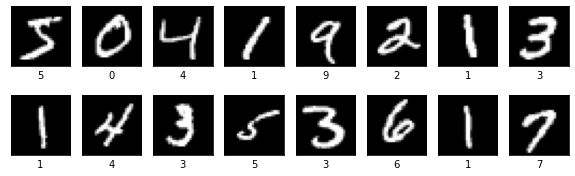

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
for i in range(0, 16):
    plt.subplot(2, 8, i+1) #rows, columns
    img, y = train_dataset[i]
    plt.imshow(img.numpy().reshape(28, 28), cmap='gray')
    plt.xlabel(str(y))
    plt.xticks([])
    plt.yticks([])
plt.show()

Now, let's take a closer look at a single tuple of the training dataset. The first element of the tuple is a 28 by 28 float tensor of the image and the second element contains a long tensor which is the actual class of the image. In this case the image is 5 so the second element of the tuple will be a 5.

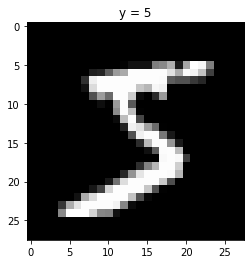

In [26]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))
show_data(train_dataset[0])

Now let's talk about creating a model for performing classification. We'll use our Softmax classifier that we created previously.

In [27]:
class SoftMax(nn.Module):
    def __init__(self, in_size, out_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

We'll concatenate our 28 by 28 images to a 1D vector, thus, our images that is 28 by 28 dimensions will be converted to 28x28 before the SoftMax classifier. Also, since we have 10 output classes our output dimension will be 10.

In [50]:
input_dim = 28*28
output_dim = 10

model = SoftMax(input_dim, output_dim)
print('W:', list(model.parameters())[0].size())
print('b:', list(model.parameters())[1].size())

W: torch.Size([10, 784])
b: torch.Size([10])


As learnt previously, the Softmax classifier uses parameter vectors for classification. Since we have 10 output classes we'll have 10 weight parameters and 10 bias parameters for Softmax. Each parameter will be 784 dimensions long. As initially all the parameters are random, the visualization of the parameters looks like random noise. 

Next, we specify our loss criterion function as cross entropy loss. In PyTorch, when the loss criteria is specified as cross entropy loss,
PyTorch will automatically perform Softmax classification based upon its inbuilt functionality. Another note, the input for the loss criterion here needs to be a long tensor with dimension of $N$. We also have to specify our optimizer and learning rate for our model, as well as a few other parameters such as the number of epochs, the misclassified samples and the correctly classified samples.

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100

So we create our train loader and our batch size will be 100. Similarly, we define our validation loader and our batch size will be 5000
and again this is technically our test data. 

In [52]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

Now, let's train our model. The code for training the model is below. As you can see, everything looks identical except for the view method. What it does is that for each element in the training batch it converts the rectangle tensors in a batch to a row tensor. In a single epoch, we first train the model with the `train_loader`. Then, we test our model with the validation dataset. We calculate the `max` of the predicted output on the validation data. If we look at our predicted class y hat, we'll get the largest element of Z and y test will be our actual classes. We compare each element of y hat with the corresponding element of "y test". We get a binary vector, which contains 1 at the index. If there's a match at the corresponding elements of y hat and "y test". Otherwise it contains a zero if there isn't a match. We sum all the values in this binary vector. We convert the result to accuracy and store it.

In [53]:
import progressbar
pbar = progressbar.ProgressBar(n_epochs)

N_test = len(validation_dataset)
loss_epoch = []
accuracy_list = []
for epoch in range(n_epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x.view(-1, 28*28))
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
    loss_epoch.append(loss)
    
    correct = 0
    for x_test, y_test in validation_loader:
        z = model(x_test.view(-1, 28*28))
        _, yhat = torch.max(z.data, 1)
        correct = correct + (yhat == y_test).sum().item()
    accuracy = correct / float(N_test)
    accuracy_list.append(accuracy)
    
    pbar.update()

[100 %] Time elapsed: 00:14:28 | ETA: 00:00:00
Total time elapsed: 00:14:28


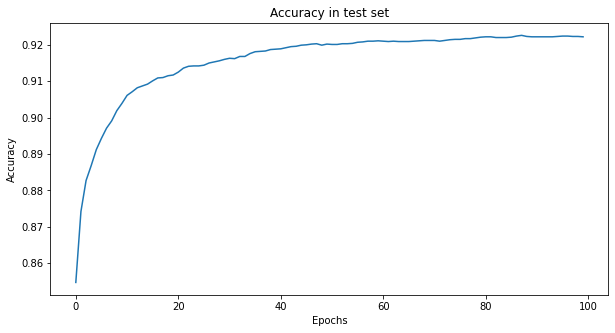

In [54]:
plt.figure(figsize=(10,5))
plt.plot(accuracy_list)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy in test set')
plt.show()

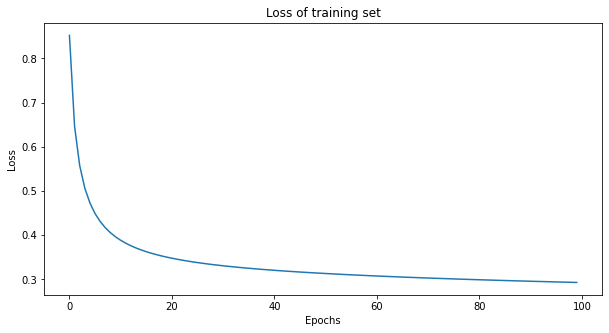

In [55]:
plt.figure(figsize=(10,5))
plt.plot(loss_epoch)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of training set')
plt.show()